In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

#加载数据集
iris=sns.load_dataset("iris")
iris.head()
# & Sepal.Length（花萼长度），单位是cm;
# & Sepal.Width（花萼宽度），单位是cm;
# & Petal.Length（花瓣长度），单位是cm;
# & Petal.Width（花瓣宽度），单位是cm;
# Iris Setosa（山鸢尾）、Iris Versicolour（杂色鸢尾），以及Iris Virginica（维吉尼亚鸢尾）。

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# 数据可视化

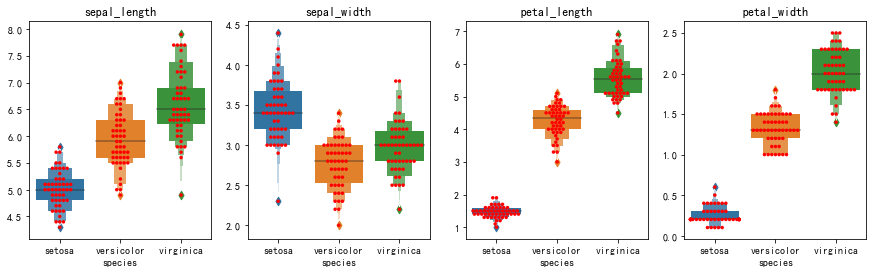

In [7]:
fig, axs = plt.subplots(1, 4, figsize=(15,4))
for i in range(4):
    sns.boxenplot(x="species", y=iris.columns[i], data=iris, ax = axs[i])
    sns.swarmplot(x="species", y=iris.columns[i], data=iris, ax = axs[i],size = 3.5, color="red")
    axs[i].set_title(iris.columns[i])
    axs[i].set_ylabel('')


D:\000Program\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


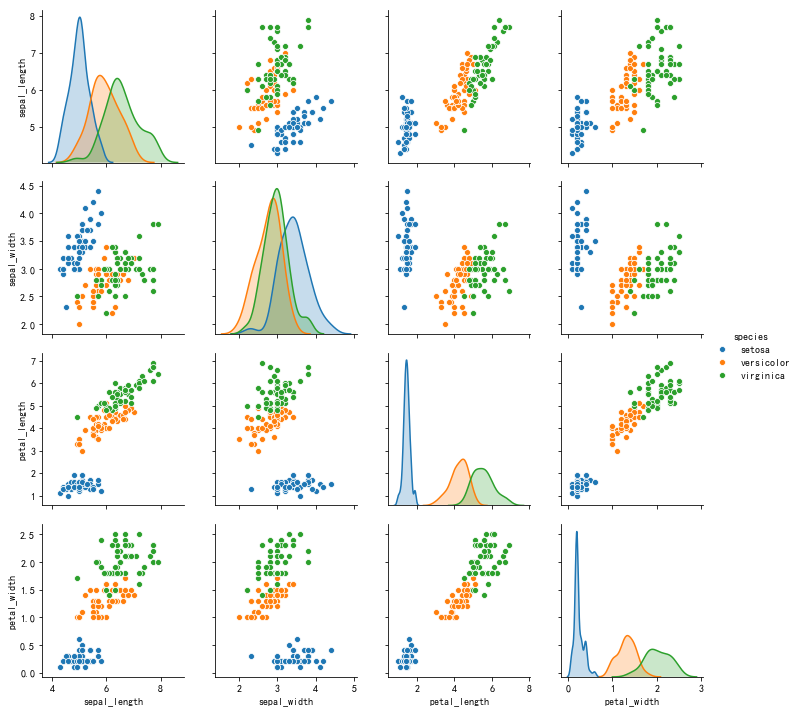

In [11]:
g = sns.pairplot(iris, hue="species")

# 数据的处理

In [12]:
#对类型进行重编码（one-hot）
dummies_iris = pd.get_dummies(iris['species'], prefix= 'species')
iris_df = pd.concat([iris, dummies_iris], axis=1)
iris_df.drop(['species'], axis=1, inplace=True)
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


# 模型的建立与求解

In [13]:
#模型建立

#sigmoid函数
def sigmoid(X):
    return 1/(1+np.exp(-X))
# 预测
def predict(X_train,w):
    return sigmoid( X_train * w )

# 获取错误率
def predict_error(X_train,X_test,Y_train,Y_test,w):
    train_pred = np.round(predict(X_train,w))
    test_pred = np.round(predict(X_test,w))
    error_train = 1- metrics.accuracy_score(Y_train, train_pred)
    error_test = 1- metrics.accuracy_score(Y_test, test_pred)
    return error_train,error_test

#梯度下降法
def gra_ascent_train( X ,Y,alpha=0.01,epoch=100, test_size = 0.3,random_state= 1111):
    
    X_train,X_test,Y_train,Y_test = train_test_split( X ,Y, test_size=test_size, random_state= random_state)
#     初始化
    w = np.ones((X_train.shape[1],Y_train.shape[1]))
    error_train = np.ones((epoch,))
    error_test = np.ones((epoch,))
#     训练
    for i in range(epoch):
        error_train[i],error_test[i] = predict_error( X_train,X_test,Y_train,Y_test,w)#         记录
        error = predict(X_train,w) - Y_train#         更新权值
        w = w - alpha * X_train.transpose() * error
    return w,error_train,error_test

test_size:0.1|  accuracy_score_train: 1.000  accuracy_score_test:1.000
test_size:0.3|  accuracy_score_train: 1.000  accuracy_score_test:1.000
test_size:0.5|  accuracy_score_train: 1.000  accuracy_score_test:1.000


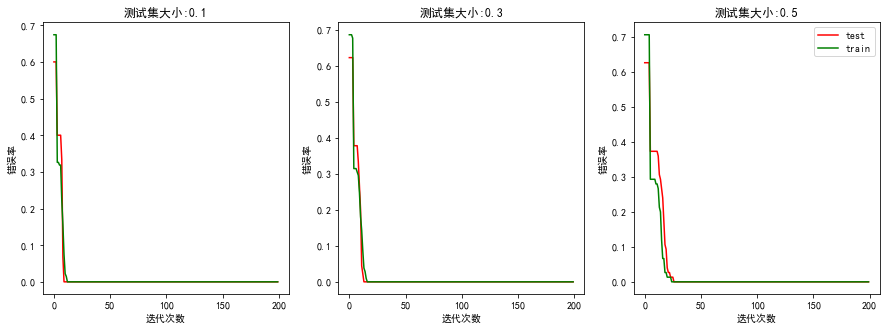

In [25]:
Y =iris_df.iloc[:,4:5]
X =iris_df.iloc[:,:4]
X['b'] = 1
fig, axs = plt.subplots(1, 3, figsize=(15,5))
# 模型求解
for i,test_sizei in enumerate([0.1,0.3,0.5]):
#     alpha学习率，test_size测试集大小
    w,error_train,error_test = gra_ascent_train(
        np.mat(X) ,np.mat(Y),alpha=0.001,epoch=200,test_size = test_sizei,random_state= 1212)
    print("test_size:{0:.1f}|  accuracy_score_train: {1:.3f}  accuracy_score_test:{2:.3f}".format(
                 test_sizei,1-error_train[-1:][0],
                 1-error_test[-1:][0]))
#     # 绘图
    axs[i].plot(range(0,len(error_test),1), error_test, 'r-',range(0,len(error_train),1), error_train,'g-',linewidth=1.5)
    
    axs[i].set_ylabel("错误率")
    axs[i].set_title("测试集大小:{0:.1f}".format(test_sizei))
    axs[i].set_xlabel("迭代次数")
    plt.legend(['test','train'])